<a href="https://colab.research.google.com/github/mayurgurav-45/PYTHON-WORKSHOP/blob/main/Pandas_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
ipl = pd.read_csv(r'/content/ipl-matches.csv')
ipl.sample(2)
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [3]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

**Find all the final winners**

In [4]:
mask = ipl['MatchNumber'] == 'Final'
new_df = ipl[mask]
new_df[['Season','WinningTeam']]
ipl[ipl['MatchNumber'] == 'Final'][['Season','WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


**How many super over finishes have occured**

In [5]:
ipl[ipl['SuperOver']== 'Y'].shape[0]

14

**How many matches has csk won in kolkata**

In [6]:
ipl[(ipl['City'] == 'Kolkata') & (ipl['WinningTeam'] == 'Chennai Super Kings')].shape[0]

5

**Toss winner is match winner in percentage**

In [7]:
(ipl[ipl['TossWinner'] == ipl['WinningTeam']].shape[0]/ipl.shape[0])*100

51.473684210526315

In [8]:
def head_to_head_record(df, team_a, team_b):
    mask = ((df['Team1'] == team_a) & (df['Team2'] == team_b)) | ((df['Team1'] == team_b) & (df['Team2'] == team_a))
    matches = df[mask]

    team_a_wins = (matches['WinningTeam'] == team_a).sum()
    team_b_wins = (matches['WinningTeam'] == team_b).sum()
    total_matches = len(matches)

    return {'Total Matches': total_matches,
            f'{team_a} Wins': team_a_wins,
            f'{team_b} Wins': team_b_wins
           }

head_to_head_record(ipl, 'Kochi Tuskers Kerala', 'Deccan Chargers')


{'Total Matches': 1,
 'Kochi Tuskers Kerala Wins': np.int64(0),
 'Deccan Chargers Wins': np.int64(1)}

**Movies Data**

In [9]:
movies = pd.read_csv(r'/content/movies (1).csv')
movies.sample(4)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1002,Summer 2007,tt1260689,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Summer_2007,Summer 2007,Summer 2007,0,2008,\N,Crime|Drama|Thriller,6.4,224,Believing in 'beginner's luck' Rahul Sharma ...,Believing in 'beginner's luck' Rahul Sharma ...,NaN,Ahraz Ahmed|Punit Aneja|Arjan Bajwa|Neetu Chan...,NaN,NaN
1576,Aamdani Atthanni Kharcha Rupaiya,tt0305173,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aamdani_Atthanni...,Aamdani Atthanni Kharcha Rupaiya,Aamdani Atthanni Kharcha Rupaiya,0,2001,150,Comedy|Drama|Family,4.7,1026,Jhoomri and her husband Bhimsha move into a ...,In order to make ends meet three women steps ...,NaN,Govinda|Juhi Chawla|Tabu|Chandrachur Singh|Joh...,1 nomination,21 December 2001 (India)
654,Lootera,tt2224317,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Lootera,Lootera,Lootera,0,2013,136,Drama|Romance,7.3,13794,The year is 1953. A visiting archaeologist cal...,An aristocrat's daughter falls in love with a ...,NaN,Ranveer Singh|Sonakshi Sinha|Barun Chanda|Adil...,4 wins & 20 nominations,5 July 2013 (India)
501,Kuku Mathur Ki Jhand Ho Gayi,tt2998196,NaN,https://en.wikipedia.org/wiki/Kuku_Mathur_Ki_J...,Kuku Mathur Ki Jhand Ho Gayi,Kuku Mathur Ki Jhand Ho Gayi,0,2014,109,Comedy|Romance,5.4,229,An easy going middle class delhite boy kuku ...,When Kuku's friend is unable to give him enoug...,NaN,Siddharth Gupta|Simran Kaur Mundi|,NaN,30 May 2014 (India)


**Action movies with rating higher than 7.5**

In [10]:
condition_1 = movies['genres'].str.contains('Action')
condition_2 = movies['imdb_rating'] > 7.5
movies[condition_1 & condition_2]
len(movies[condition_1 & condition_2])

33

**Adding new column in dataframe**

In [11]:
movies['Country'] = 'India'
movies.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India


In [12]:
movies.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date', 'Country'],
      dtype='object')

**Dropping a Column**

In [13]:
movies.drop('Country',axis=1,inplace=True)

In [14]:
movies.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

**Man of the Matches/POTM in only Playoffs**

In [15]:
playoff_matches = ipl[~ipl['MatchNumber'].str.isdigit()]
potm_in_playoffs = playoff_matches['Player_of_Match']
potm_in_playoffs.value_counts()

,count
Player_of_Match,
F du Plessis,3
SK Raina,3
KA Pollard,3
JJ Bumrah,2
AB de Villiers,2
MK Pandey,2
M Vijay,2
A Kumble,2
YK Pathan,2


Toss decision plot

<Axes: ylabel='count'>

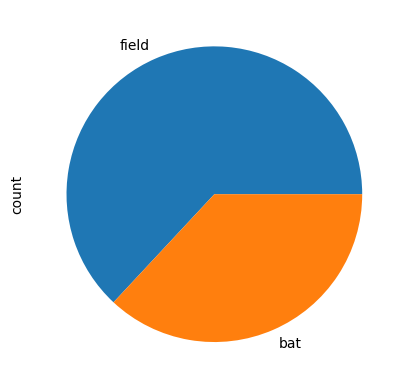

In [16]:
ipl['TossDecision'].value_counts().plot(kind='pie')

In [17]:
ipl['Team2'].value_counts()

,count
Team2,
Mumbai Indians,119
Kolkata Knight Riders,118
Rajasthan Royals,103
Royal Challengers Bangalore,100
Kings XI Punjab,98
Chennai Super Kings,97
Sunrisers Hyderabad,83
Delhi Daredevils,76
Deccan Chargers,36


In [18]:
ipl['Team1'].value_counts()

,count
Team1,
Royal Challengers Bangalore,126
Mumbai Indians,112
Chennai Super Kings,111
Kolkata Knight Riders,105
Kings XI Punjab,92
Rajasthan Royals,89
Delhi Daredevils,85
Sunrisers Hyderabad,69
Deccan Chargers,39


In [19]:
(ipl['Team2'].value_counts() + ipl['Team1'].value_counts()).sort_values(ascending=False)

,count
Mumbai Indians,231
Royal Challengers Bangalore,226
Kolkata Knight Riders,223
Chennai Super Kings,208
Rajasthan Royals,192
Kings XI Punjab,190
Delhi Daredevils,161
Sunrisers Hyderabad,152
Deccan Chargers,75
Delhi Capitals,63


In [20]:
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


**Sort Dataframe by year of release in ascending and title in Descending**

In [21]:
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


**Merging Concatenating Joining**

In [22]:
courses = pd.read_csv('/content/courses.csv',index_col='course_id')
students = pd.read_csv('/content/students.csv',index_col='student_id')
nov = pd.read_csv('/content/reg-month1.csv')
dec = pd.read_csv('/content/reg-month2.csv')
matches = pd.read_csv('/content/matches.csv',index_col='id')
delivery = pd.read_csv('/content/deliveries.csv')

In [24]:
delivery.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8109,35,1,Delhi Daredevils,Kings XI Punjab,1,5,SW Billings,SV Samson,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
28754,124,2,Royal Challengers Bangalore,Deccan Chargers,17,4,V Kohli,KV Sharma,Harmeet Singh,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [25]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [26]:
regs = pd.concat([nov,dec])
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [27]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])
multi

student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [28]:
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


**Inner Join : Join rows having common values**

Left Join

In [29]:
courses.merge(regs,how='left',on='course_id')
"""
For Left Join - how='left',
For Right Join - how='right',
For Inner Join - how='inner',
For Full Join - how='outer',
"""

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


**Find total revenue generated**

In [30]:
total = regs.merge(courses,how='inner',on='course_id')['price'].sum()
total

np.int64(154247)

**Plot bar chart for revenue/course**

<Axes: ylabel='course_name'>

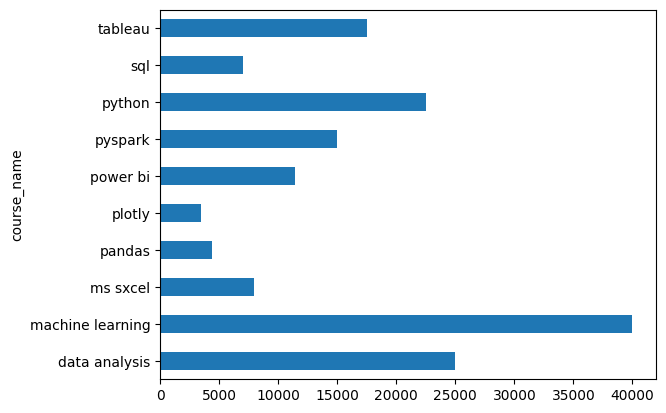

In [33]:
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind='barh')

**Find students' array who enrolled in both the months i.e. Nov and Dec**

In [32]:
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])